## Setup

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras.applications import resnet

target_shape = (200, 200)

In [4]:
def preprocess_image(filename):
    """
    Load the specified file as a JPEG image, preprocess it and
    resize it to the target shape.
    """

    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, target_shape)
    return image

## Load the test-dataset

In [5]:
dir = "test/"
dog0 = dir + "test-dog0.jpg"
dog1 = dir + "test-dog1.jpg"
cat0 = dir + "test-cat0.jpg"

test_imgs = [dog0, dog1, cat0]
test_imgs

['test/test-dog0.jpg', 'test/test-dog1.jpg', 'test/test-cat0.jpg']

In [6]:
# read images
imgs = np.array([preprocess_image(test_img) for test_img in test_imgs])
imgs.shape

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



(3, 200, 200, 3)

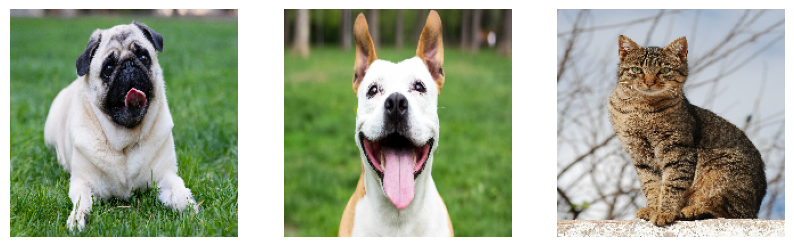

In [7]:
# visualize
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

ax[0].imshow(imgs[0])
ax[0].set_axis_off()
ax[1].imshow(imgs[1])
ax[1].set_axis_off()
ax[2].imshow(imgs[2])
ax[2].set_axis_off()

plt.show()


## Load the model

In [8]:
embeddings = tf.keras.models.load_model("siamesenetwork.h5")

After loading the model, let's generate embedding for our toy testset.

In [9]:
imgs_emb = embeddings(imgs)

print("embeddings shape:", imgs_emb.shape)

embeddings shape: (3, 256)


Now, lets meature the similarity between test samples using cosin metric.

In [10]:
cosine_similarity = metrics.CosineSimilarity()

# dog0 - to - dog1 distance
positive_similarity = cosine_similarity(imgs_emb[0], imgs_emb[1])
print("Positive similarity:", positive_similarity.numpy())

Positive similarity: 0.9991517


In [11]:
# dog0 - to - cat0 distance
negative_similarity = cosine_similarity(imgs_emb[0], imgs_emb[2])
print("Negative similarity:", negative_similarity.numpy())

Negative similarity: 0.9981737


In [12]:
# dog1 - to - cat0 distance
negative_similarity = cosine_similarity(imgs_emb[1], imgs_emb[2])
print("Negative similarity:", negative_similarity.numpy())

Negative similarity: 0.9976926


In [13]:
delta = positive_similarity.numpy() - negative_similarity.numpy()
print("Delta diffence between positive and negative samples:", delta > 0, delta)

Delta diffence between positive and negative samples: True 0.0014591217


### Conclution:
    Delt must be a positive number.

To do:
- Train model with much data.
- Train for longer time.